Disclaimer:
The dataset is for practice purpose only. And it is not representative of the population

In [1]:
import pandas as pd
import sqlite3


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
conn = sqlite3.connect('/content/drive/MyDrive/tiki_data (1).db')
cur = conn.cursor()

# Most reviewed product

In [5]:
query = '''

SELECT Count(*)
FROM 'products'


'''
pd.read_sql_query(query, conn)

,Count(*)
0,8166


In [6]:
query = '''

SELECT Max(Review), cat_ID, Name, Price, URL, Image, SKU, Review, Rating
FROM 'products'
WHERE Review NOT LIKE "N/A"
LIMIT 1

'''
pd.read_sql_query(query, conn)

,Max(Review),cat_id,Name,Price,URL,Image,SKU,Review,Rating
0,4189,3,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,273000,https://tiki.vn/chuot-khong-day-logitech-m331-...,https://salt.tikicdn.com/cache/280x280/media/c...,6702966607906,4189,4.7


# Categories with the most products

In [7]:
query = '''
select c1.name, p.cat_id, COUNT(p.name) as most_products
FROM "categories" as c1
JOIN "categories" as c2
ON c1.id = c2.parent_id
JOIN products p 
ON c1.id = p.cat_id
GROUP BY p.cat_id
ORDER BY most_products DESC

'''
# Almost but not quite
pd.read_sql_query(query, conn)

,name,cat_id,most_products
0,Các Loại Cáp Chuyển Đổi,45,546
1,Loa,73,378
2,Bao Da - Ốp Lưng,26,312
3,Phụ Kiện - Thiết Bị Số,3,288
4,Điện Thoại - Máy Tính Bảng,1,240
5,Phụ Kiện Phím Chuột Văn Phòng,47,224
6,Phụ kiện điện lạnh,20,205
7,Phụ kiện máy tính và Laptop,10,200
8,Phụ Kiện Âm Thanh,57,188
9,Phụ Kiện Laptop,44,168


# Least Expensive Categories

In [8]:
query = '''

select c1.name, p.cat_id, min(price) as min_price
FROM "categories" as c1
JOIN "categories" as c2
ON c1.id = c2.parent_id
JOIN products p 
ON c1.id = p.cat_id
GROUP BY p.cat_id
ORDER BY min_price ASC
'''

# Almost
pd.read_sql_query(query, conn)

,name,cat_id,min_price
0,Phụ Kiện - Thiết Bị Số,3,10000
1,Thiết Bị Thông Minh và Linh Kiện Điện Tử,13,10000
2,Phụ Kiện Thiết Bị Đeo Thông Minh,61,12800
3,Phụ Kiện Âm Thanh,57,14000
4,Phụ Kiện Chơi Game,39,15000
5,Phụ kiện máy tính và Laptop,10,17900
6,Phụ kiện âm thanh,77,18000
7,Dụng Cụ Vệ Sinh và Sửa Chữa,52,19500
8,Phụ Kiện Chụp Hình,37,25000
9,Dây Sạc - Dây Cáp,29,25500


# Categories With Highest Average Rating

In [9]:
query = '''

select c1.name, p.cat_id, AVG(rating) as avg_rating
FROM "categories" as c1
JOIN "categories" as c2
ON c1.id = c2.parent_id
JOIN products p 
ON c1.id = p.cat_id
GROUP BY p.cat_id
ORDER BY avg_rating DESC

'''
pd.read_sql_query(query, conn)

,name,cat_id,avg_rating
0,Phụ Kiện Điện Thoại và Máy Tính Bảng,9,4.500000
1,Bàn Phím Rời - Bút Cảm Ứng,38,4.500000
2,Loa Nghe Nhạc,54,4.500000
3,Phụ Kiện Phím Chuột Chơi Game,48,4.417391
4,Phụ Kiện - Thiết Bị Số,3,4.377083
5,Thẻ Nhớ và Bộ Nhớ Mở Rộng,35,4.375000
6,Thiết Bị Âm Thanh và Phụ Kiện,11,4.305882
7,Mạch Điện Lập Trình và Linh Kiện Điện Tử,66,4.280000
8,Tai Nghe Có Dây,56,4.272727
9,Các Loại Cáp Chuyển Đổi,45,4.215385


# Categories with the most TIKI-NOW deals

In [10]:
query = '''

select p.id,c1.name, p.cat_id, SUM(Tiki_Now) as tiki_now
FROM "categories" as c1
JOIN "categories" as c2
ON c1.id = c2.parent_id
JOIN products p 
ON c1.id = p.cat_id
GROUP BY p.cat_id
ORDER BY tiki_now DESC


'''

pd.read_sql_query(query, conn)

,ID,name,cat_id,tiki_now
0,5634,Các Loại Cáp Chuyển Đổi,45,532
1,48,Phụ Kiện - Thiết Bị Số,3,258
2,3880,Bao Da - Ốp Lưng,26,221
3,2065,Phụ kiện máy tính và Laptop,10,180
4,3148,Điện Thoại - Máy Tính Bảng,1,165
5,625,Phụ Kiện Phím Chuột Văn Phòng,47,148
6,1592,Phụ Kiện Âm Thanh,57,144
7,5884,Phụ Kiện Laptop,44,138
8,2396,Phụ Kiện Chơi Game,39,120
9,1850,Tai Nghe Có Dây,56,120


# Scatterplot of the Prices of all Products

In [13]:
query = '''

SELECT cat_id, name, price
FROM "products"

'''

pd.read_sql_query(query, conn)




,cat_id,Name,Price
0,3,Tai nghe bluetooth không dây F9 True wireless ...,129000
1,3,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,5090000
2,3,Adapter Sạc 1 Cổng Anker 18W / 20W PowerPort I...,340000
3,3,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,76900
4,3,Chuột Không Dây Logitech M330 Silent Plus- Hàn...,273000
...,...,...,...
8161,34,Hộp Đựng Bảo Vệ Chuyên Dụng Cho Tai Nghe Airpo...,78000
8162,34,Bao Case Cho Airpods 1/ 2 Hình Vô Diện,57000
8163,34,Bao Case Ốp Cho Airpods 1 / Airpods 2 Liquid S...,183000
8164,34,Vỏ bảo vệ bao đựng tai nghe case dành cho airp...,50000


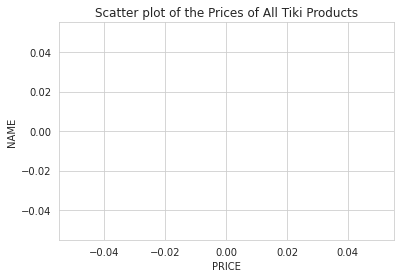

In [ ]:
price_prod = pd.read_sql_query(query, conn)

price_prod = pd.DataFrame(data= price_prod, columns=['PRICE', 'NAME'])
price_prod.plot.scatter(x='PRICE', y='NAME', title= "Scatter plot of the Prices of All Tiki Products")



In [ ]:
price_prod.plot.scatter(x, y, s=None, c=None, **kwargs)[source]

NameError: ignored